### Import and take a look at the aggregate data

- import all SBit score data
- find best pairs with traditional methods
- find best positions?
- find best peptides?
- maybe random forest model?

In [2]:
import sys
  
# setting path
sys.path.append('../src')

import AnalysisTools as at

In [19]:
from os import listdir
C8_path = "../data/C8"

dfs = []
for dir in listdir(C8_path):
    if dir != ".DS_Store":
        df = at.read_decoy_dir(C8_path+"/"+dir+"/", ".sc")
        if dir == "NP_C8":
            df['SBit'] = dir.split("_")[0]
        else:
            df['SBit'] = dir.split("_")[0][4:]
        at.add_labels(df)
        top = at.get_top(df, 'mutcode', 'I_sc', 1)
        dfs.append(top)

In [20]:
import pandas as pd

data = pd.concat(dfs)
data.shape

(4140, 51)

In [21]:
data.sample(5)

,decoy,I_bsa,I_hb,I_pack,I_sc,I_unsat,dslf_fa13,fa_atr,fa_dun,fa_elec,...,startRMSbb,startRMSca,total_score,yhh_planarity,filename,SBit,position,mutcode,AA,aa class
0,A153_GLYparent_0001_0001,2096.412109,19,-0.011220,-99.106567,0,0,-925.248926,204.431764,-297.721802,...,0,0,-487.084439,0.086077,A153_GLYparent_0001.pdb_dock.sc,78,153,153GLY,GLY,nonpolar
0,A155_SERparent_0001_0001,2058.079102,18,-0.020106,-90.923096,0,0,-919.049398,203.380417,-303.620184,...,0,0,-489.293639,0.169179,A155_SERparent_0001.pdb_dock.sc,101,155,155SER,SER,polar
0,A141_ILEparent_0001_0001,1975.327148,18,0.012326,-74.264130,0,0,-918.587697,204.915334,-288.418320,...,0,0,-447.237028,0.228603,A141_ILEparent_0001.pdb_dock.sc,114,141,141ILE,ILE,nonpolar
0,A147_ASNparent_0001_0001,1952.808594,17,0.044249,-71.721893,0,0,-915.599864,209.471087,-289.984225,...,0,0,-433.607469,0.174719,A147_ASNparent_0001.pdb_dock.sc,114,147,147ASN,ASN,polar
0,A154_TYRparent_0001_0001,1922.637695,16,0.029415,-74.727570,0,0,-926.161112,211.326465,-291.909493,...,0,0,-449.418101,0.171697,A154_TYRparent_0001.pdb_dock.sc,114,154,154TYR,TYR,polar


In [24]:
from itertools import combinations

len(list(combinations(set(data['SBit']),2)))

36

In [44]:
for_CC = pd.pivot(data, index='mutcode', columns='SBit', values='I_sc')
import numpy as np

for_CC_pos = np.abs(for_CC)
for_CC_pos[:5]

SBit,101,104,114,128,78,79,86,99,NP
mutcode,,,,,,,,,
136ALA,85.499725,89.015228,71.630981,89.468964,95.803497,99.759186,96.243408,89.035095,99.312500
136ARG,84.954193,88.600128,71.126648,89.084564,95.702606,99.301636,96.629211,88.678375,99.312958
136ASN,85.506073,88.587463,70.700714,89.480621,95.704376,99.618347,96.848419,89.044342,97.945465
136ASP,85.533844,89.005066,70.495026,89.488251,95.625671,99.559326,96.813995,89.049011,99.007843
136CYS,85.594849,89.083038,70.879364,89.554321,95.724304,100.101379,96.802948,89.032623,99.450897


In [30]:
for_CC_pos.to_csv("../data/for_CC_pos.csv")

In [41]:
for_CC_pos.reset_index()[[x for x in for_CC_pos.columns if x != 'mutcode']].to_csv("../data/for_CC_pos.csv")

In [42]:
cc_result = pd.read_csv("../data/for_CC_out.csv")

cc_result[:10]

,rank,O score,matrix,c1,m1,c2,m2
0,1,2.021806,114 99\n363 7.00E+01 1.01E+02\n...,114,381,99,363
1,2,2.020289,114 128\n363 7.00E+01 1.01E+02\n...,114,381,128,363
2,3,2.019764,114 128\n363 7.00E+01 1.01E+02\n...,114,384,128,363
3,4,2.019568,114 99\n363 7.00E+01 1.01E+02\n...,114,384,99,363
4,5,2.019453,101 114\n363 9.52E+01 7.00E+01\n...,101,363,114,381
5,6,2.019382,114 79\n363 7.00E+01 1.09E+02\n...,114,390,79,363
6,7,2.019170,114 99\n305 8.04E+01 8.84E+01\n...,114,305,99,363
7,8,2.019165,114 128\n366 7.01E+01 1.00E+02\n...,114,381,128,366
8,9,2.019039,114 79\n363 7.00E+01 1.09E+02\n...,114,383,79,363
9,10,2.018747,114 99\n297 8.36E+01 9.21E+01\n...,114,297,99,363


In [58]:
mut_dict = dict(zip(range(len(for_CC_pos.index)),for_CC_pos.index))
cc_result['mut1'] = cc_result['m1'].apply(lambda x: mut_dict[x])
cc_result['mut2'] = cc_result['m2'].apply(lambda x: mut_dict[x])
cc_result['c2'] = cc_result['c2'].astype(str)
cc_result['c1'] = cc_result['c1'].astype(str)

cc_result[:10]

,rank,O score,matrix,c1,m1,c2,m2,mut1,mut2
0,1,2.021806,114 99\n363 7.00E+01 1.01E+02\n...,114,381,99,363,155ARG,154ASP
1,2,2.020289,114 128\n363 7.00E+01 1.01E+02\n...,114,381,128,363,155ARG,154ASP
2,3,2.019764,114 128\n363 7.00E+01 1.01E+02\n...,114,384,128,363,155CYS,154ASP
3,4,2.019568,114 99\n363 7.00E+01 1.01E+02\n...,114,384,99,363,155CYS,154ASP
4,5,2.019453,101 114\n363 9.52E+01 7.00E+01\n...,101,363,114,381,154ASP,155ARG
5,6,2.019382,114 79\n363 7.00E+01 1.09E+02\n...,114,390,79,363,155LEU,154ASP
6,7,2.019170,114 99\n305 8.04E+01 8.84E+01\n...,114,305,99,363,151GLN,154ASP
7,8,2.019165,114 128\n366 7.01E+01 1.00E+02\n...,114,381,128,366,155ARG,154GLU
8,9,2.019039,114 79\n363 7.00E+01 1.09E+02\n...,114,383,79,363,155ASP,154ASP
9,10,2.018747,114 99\n297 8.36E+01 9.21E+01\n...,114,297,99,363,150TRP,154ASP


In [64]:
from collections import Counter

c = zip(cc_result['c1'], cc_result['c2'])

#c = pd.concat([cc_result['c1'],cc_result['c2']])
cc = Counter(c)
cc.most_common(5)


[(('114', '128'), 208),
 (('114', '99'), 203),
 (('101', '114'), 172),
 (('114', '79'), 125),
 (('114', '86'), 99)]

In [65]:
m = zip(cc_result['mut1'].apply(lambda x: x[:-3]), cc_result['mut2'].apply(lambda x: x[:-3]))
#m = pd.concat([cc_result['mut1'], cc_result['mut2']])
#m = m.apply(lambda x: x[:-3])
mm = Counter(m)
mm.most_common(10)

[(('155', '154'), 278),
 (('156', '154'), 93),
 (('154', '155'), 82),
 (('155', '158'), 72),
 (('155', '149'), 70),
 (('151', '154'), 59),
 (('150', '154'), 48),
 (('149', '155'), 34),
 (('153', '154'), 32),
 (('154', '156'), 29)]

## Looks like we need to be looking at 114 paired with 128 or 99 at positions 154 and 155.

In [78]:
preferences = data[data['SBit']=='114'].set_index('mutcode')
preferences['114/128'] = data[data['SBit']=='114'].set_index('mutcode')['I_sc'] / data[data['SBit']=='128'].set_index('mutcode')['I_sc']
preferences['114/99'] = data[data['SBit']=='114'].set_index('mutcode')['I_sc'] / data[data['SBit']=='99'].set_index('mutcode')['I_sc']

In [79]:
preferences.sample(10)

,decoy,I_bsa,I_hb,I_pack,I_sc,I_unsat,dslf_fa13,fa_atr,fa_dun,fa_elec,...,startRMSca,total_score,yhh_planarity,filename,SBit,position,AA,aa class,114/128,114/99
mutcode,,,,,,,,,,,,,,,,,,,,,
151TRP,A151_TRPparent_0001_0001,1874.629883,19,0.019658,-77.050262,0,0,-923.724284,212.704505,-297.982637,...,0,-450.260854,0.052911,A151_TRPparent_0001.pdb_dock.sc,114,151,TRP,nonpolar,0.794819,0.805127
148ASN,A148_ASNparent_0001_0001,1970.995117,18,-0.005952,-72.211609,0,0,-915.657940,209.425081,-294.489148,...,0,-443.367405,0.157842,A148_ASNparent_0001.pdb_dock.sc,114,148,ASN,polar,0.777160,0.775792
137PRO,A137_PROparent_0001_0001,1983.517578,18,-0.035717,-71.722656,0,0,-918.312613,202.749410,-292.131329,...,0,-454.594842,0.176890,A137_PROparent_0001.pdb_dock.sc,114,137,PRO,nonpolar,0.801154,0.801545
149LYS,A149_LYSparent_0001_0001,1994.858398,18,-0.075520,-76.237366,0,0,-917.531927,210.324057,-297.505817,...,0,-446.433435,0.275986,A149_LYSparent_0001.pdb_dock.sc,114,149,LYS,basic,0.761200,0.764528
153TYR,A153_TYRparent_0001_0001,1976.584961,15,0.051838,-80.032959,0,0,-927.816941,205.060849,-291.597090,...,0,-457.034567,0.270078,A153_TYRparent_0001.pdb_dock.sc,114,153,TYR,polar,0.831791,0.827990
139GLN,A139_GLNparent_0001_0001,1969.072266,19,0.009102,-74.831818,0,0,-919.258014,209.150994,-298.301956,...,0,-450.547320,0.157330,A139_GLNparent_0001.pdb_dock.sc,114,139,GLN,polar,0.822576,0.826795
140CYS,A140_CYSparent_0001_0001,1980.327148,17,0.024945,-75.901825,0,0,-919.464517,202.440626,-292.367736,...,0,-455.140506,0.162996,A140_CYSparent_0001.pdb_dock.sc,114,140,CYS,polar,0.827669,0.836649
138THR,A138_THRparent_0001_0001,1995.503906,18,-0.009184,-71.584076,0,0,-916.290881,203.870597,-299.731955,...,0,-457.185777,0.187500,A138_THRparent_0001.pdb_dock.sc,114,138,THR,polar,0.793048,0.797955
146PRO,A146_PROparent_0001_0001,1963.081055,18,-0.023641,-71.250061,0,0,-915.014446,209.177368,-293.410198,...,0,-431.826585,0.183009,A146_PROparent_0001.pdb_dock.sc,114,146,PRO,nonpolar,0.786118,0.788456


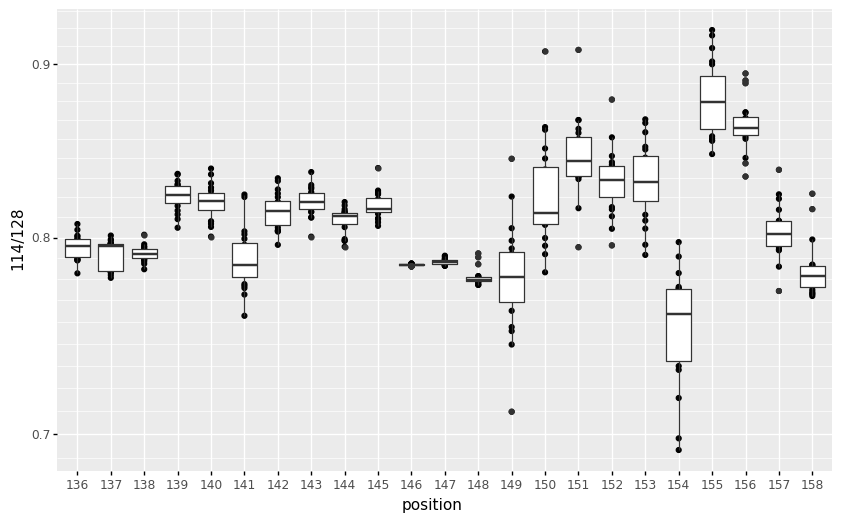

<ggplot: (8790901767918)>

In [85]:
import plotnine as pn

preferences['position'] = preferences['position'].astype(str)

pn.options.figure_size = (10, 6)
(
    pn.ggplot(preferences, pn.aes('position', '114/128', logy=True))
    + pn.geom_point()
    + pn.geom_boxplot()
    + pn.scale_y_log10()
)

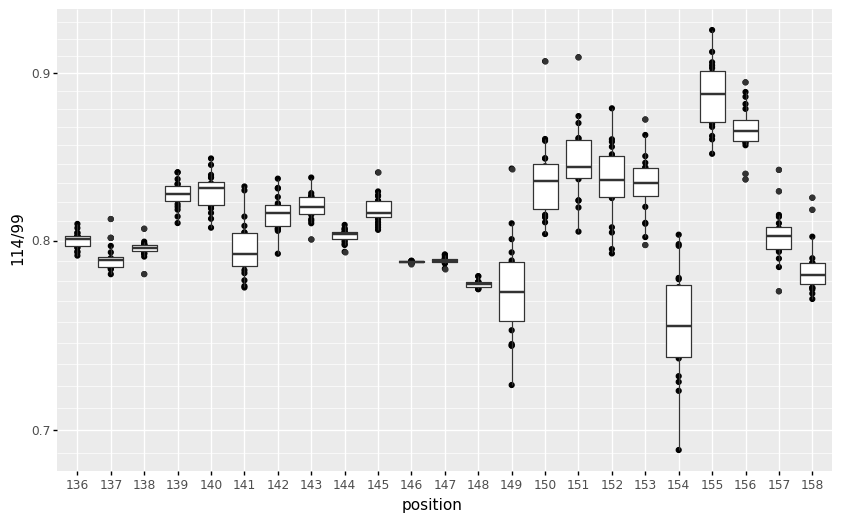

<ggplot: (8790901605645)>

In [86]:
(
    pn.ggplot(preferences, pn.aes('position', '114/99', logy=True))
    + pn.geom_point()
    + pn.geom_boxplot()
    + pn.scale_y_log10()
)

### Some follow-up questions: 

- does random forest pull out the same stuff?
- should we design a directed library at 154 and 155?
- should we screen 114 and 128 or 99 with the C8 library to see if this plays out?